In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
pd.set_option('display.max_columns', None)

In [36]:
data = pd.read_csv('startup data.csv')

In [37]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [38]:
data = data.drop(['Unnamed: 0','Unnamed: 6'], axis=1)

In [39]:
data["founded_at_year"] =  pd.to_datetime(data["founded_at"], format="%m/%d/%Y")


In [40]:
data['founded_at_year'] = data['founded_at_year'].dt.to_period('Y')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype        
---  ------                    --------------  -----        
 0   state_code                923 non-null    object       
 1   latitude                  923 non-null    float64      
 2   longitude                 923 non-null    float64      
 3   zip_code                  923 non-null    object       
 4   id                        923 non-null    object       
 5   city                      923 non-null    object       
 6   name                      923 non-null    object       
 7   labels                    923 non-null    int64        
 8   founded_at                923 non-null    object       
 9   closed_at                 335 non-null    object       
 10  first_funding_at          923 non-null    object       
 11  last_funding_at           923 non-null    object       
 12  age_first_funding_year    923 non-nu

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype        
---  ------                    --------------  -----        
 0   state_code                923 non-null    object       
 1   latitude                  923 non-null    float64      
 2   longitude                 923 non-null    float64      
 3   zip_code                  923 non-null    object       
 4   id                        923 non-null    object       
 5   city                      923 non-null    object       
 6   name                      923 non-null    object       
 7   labels                    923 non-null    int64        
 8   founded_at                923 non-null    object       
 9   closed_at                 335 non-null    object       
 10  first_funding_at          923 non-null    object       
 11  last_funding_at           923 non-null    object       
 12  age_first_funding_year    923 non-nu

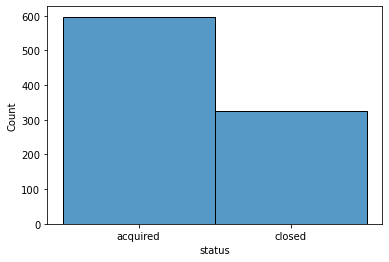

In [43]:
#distribution of  y
sns.histplot(x = 'status',data = data)
plt.savefig('output.png')

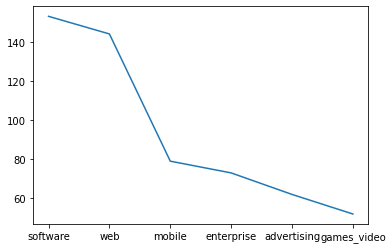

In [44]:
# top categories / industries
data['category_code'].value_counts()[:6].plot()
plt.savefig('output1.png')
# sns.catplot('category_code',data = data , 
#             kind= 'count',aspect = 10) #just show top 10

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


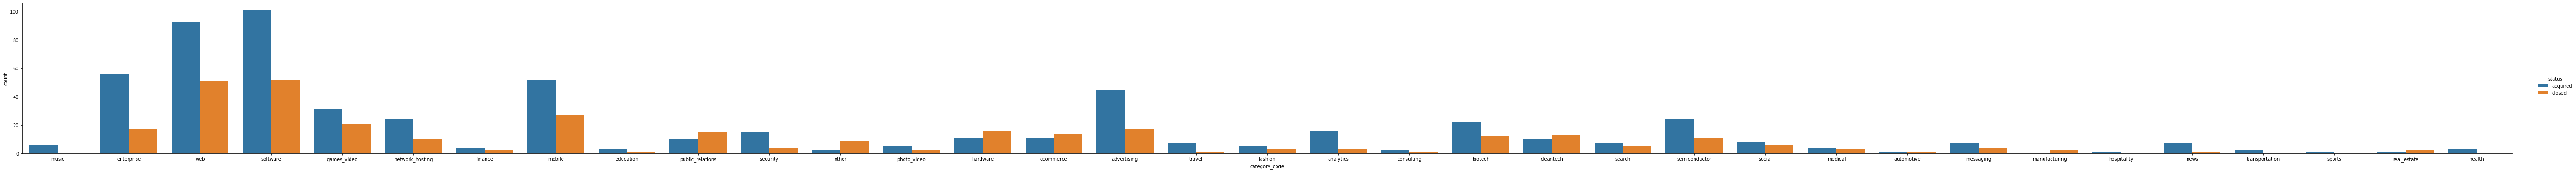

In [45]:
sns.catplot('category_code',data = data , kind= 'count', hue = 'status' ,aspect = 15)#just show top 10

#remove industry that are not as common and refer to the research paper saying to do this, count of each industry

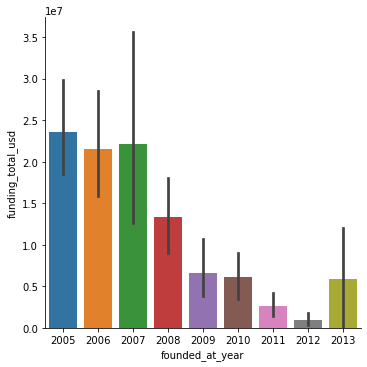

In [46]:
dataft = data[data["founded_at_year"] >= '2005'].sort_values("founded_at_year")
sns.catplot(data=dataft, x="founded_at_year", y= "funding_total_usd", kind="bar")
plt.savefig('output2.png')

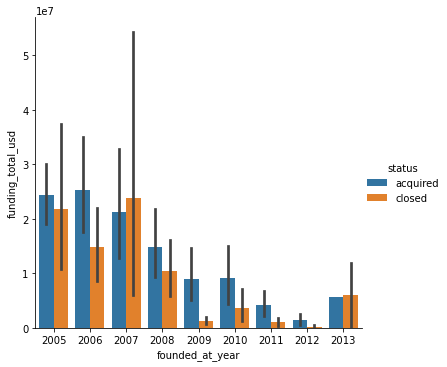

In [47]:
dataft = data[data["founded_at_year"] >= '2005'].sort_values("founded_at_year")
sns.catplot(data=dataft, x="founded_at_year", y= "funding_total_usd", hue="status",kind="bar")
plt.savefig('output3.png')

In [48]:
sns.set(rc={'figure.figsize':(1,8.2)})

In [49]:
dataft = data[data["founded_at_year"] >= '2010']

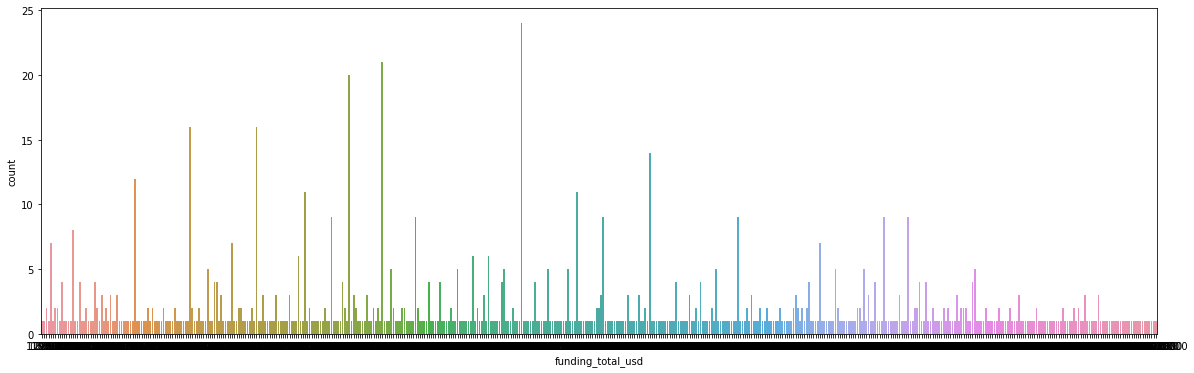

In [29]:
df=pd.read_csv('startup data.csv')
df.info
df.head
df.columns

plt.figure(figsize=(20,6)) 
sns.countplot(x='funding_total_usd', data=df) 
plt.show()

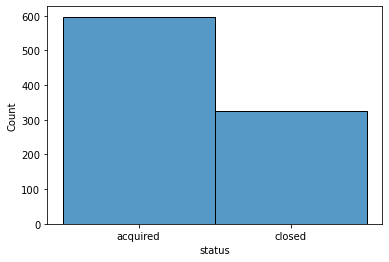

In [55]:
sns.histplot(x = 'status',data = data)
plt.savefig('output.png')

<AxesSubplot:xlabel='state_code', ylabel='funding_total_usd'>

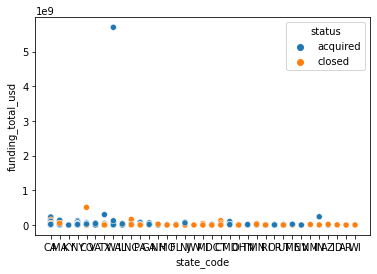

In [41]:
sns.scatterplot(data=data, x="state_code", y="funding_total_usd", hue="status")

In [33]:
data10 = data['funding_total_usd'].nlargest(n=10)

In [98]:
data.corr()

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
latitude,1.000000,0.368475,0.046560,-0.046868,-0.041692,-0.072000,-0.054275,-0.039198,-0.000659,-0.072941,0.017708,-0.417471,0.205747,0.318015,-0.423888,0.338590,-0.001656,-0.009799,0.035917,-0.002291,0.054575,-0.033160,0.041628,0.012956,-0.033905,-0.039656,0.031045,0.028891,-0.033072,-0.011801,-0.057762,-0.018825,-0.018176,0.032675
longitude,0.368475,1.000000,-0.036092,-0.014158,-0.000148,-0.051674,-0.087701,-0.073197,0.022447,0.017970,-0.016420,-0.780122,0.449871,0.441031,0.066199,0.257801,0.024857,-0.022024,0.013527,-0.003244,0.039998,-0.025569,0.043092,0.028075,0.021244,-0.046560,0.024852,0.102001,-0.066288,-0.067017,-0.042309,-0.042854,-0.045191,-0.091913
labels,0.046560,-0.036092,1.000000,-0.075637,0.073731,0.162279,0.265871,0.360434,0.206049,0.040176,0.328260,0.077217,0.059996,0.081735,-0.045309,-0.169067,0.012429,-0.000873,0.007312,0.073772,0.044355,-0.025893,-0.072193,0.000104,0.002373,-0.042408,-0.056515,-0.072840,0.184307,0.208257,0.165902,0.139940,0.185992,0.310652
age_first_funding_year,-0.046868,-0.014158,-0.075637,1.000000,0.762382,0.593526,0.472029,-0.187817,-0.155478,0.046350,-0.295894,-0.010800,-0.128102,0.020279,0.032838,0.081031,0.116797,-0.166601,-0.054658,-0.047326,-0.071336,-0.063787,-0.071580,0.190653,-0.012596,0.115649,0.168140,-0.345985,-0.293081,-0.060532,0.033388,0.121338,0.114363,0.050638
age_last_funding_year,-0.041692,-0.000148,0.073731,0.762382,1.000000,0.687515,0.632099,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,0.014965,0.029313,0.116670,-0.216886,0.010886,0.006887,-0.056837,-0.078674,-0.108662,0.189788,0.029712,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727
age_first_milestone_year,-0.072000,-0.051674,0.162279,0.593526,0.687515,1.000000,0.777484,0.245364,0.195207,0.063900,-0.054482,0.033649,-0.095814,0.045427,0.010818,-0.003098,0.152413,-0.090600,-0.034656,-0.006352,-0.002213,-0.094189,-0.085940,0.067957,0.063367,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329
age_last_milestone_year,-0.054275,-0.087701,0.265871,0.472029,0.632099,0.777484,1.000000,0.348534,0.262056,0.093529,0.333244,0.060217,-0.092801,0.028026,0.013938,-0.029718,0.080510,-0.020575,0.019088,0.000950,0.010355,-0.056627,-0.109853,0.001892,0.047602,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859
relationships,-0.039198,-0.073197,0.360434,-0.187817,0.073080,0.245364,0.348534,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,-0.012779,-0.157843,-0.087759,0.042207,0.034052,0.089621,0.110820,0.016851,-0.031035,-0.068248,0.078289,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207
funding_rounds,-0.000659,0.022447,0.206049,-0.155478,0.385999,0.195207,0.262056,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,-0.018921,-0.062794,-0.017969,-0.091871,0.104287,0.078839,-0.000867,-0.003951,-0.051723,0.018321,0.028304,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345
funding_total_usd,-0.072941,0.017970,0.040176,0.046350,0.116371,0.063900,0.093529,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,-0.003988,0.057764,-0.018932,-0.030426,0.107388,-0.010946,-0.015013,-0.011830,-0.010790,0.026082,-0.001829,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978


In [100]:

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps



<Figure size 1440x590.4 with 0 Axes>

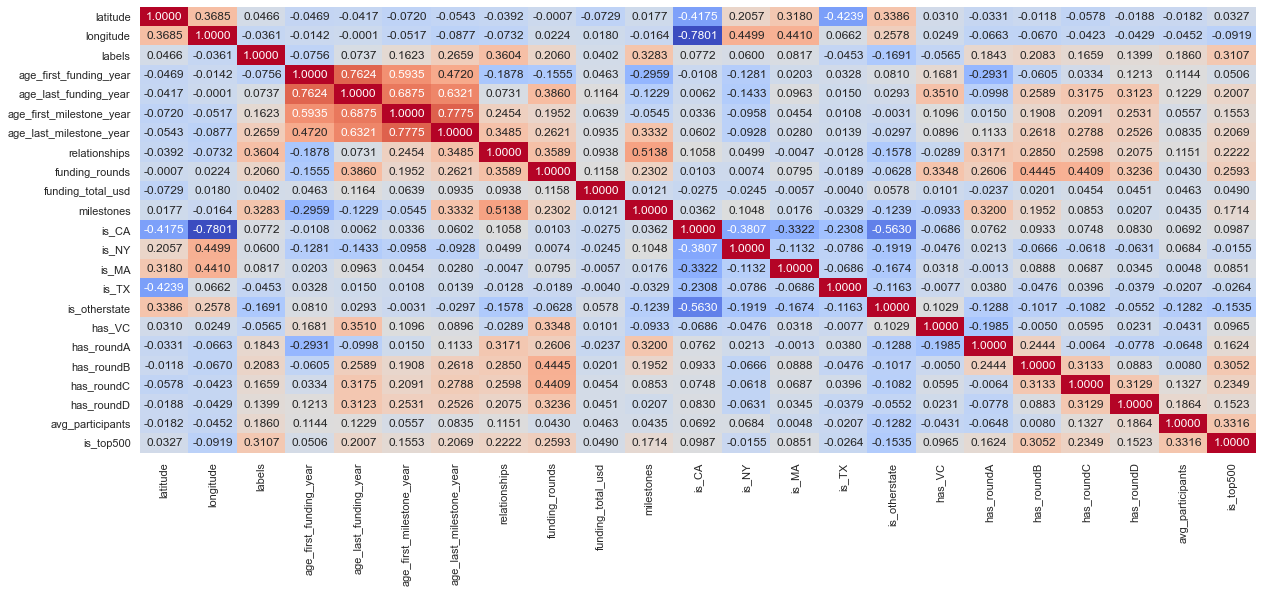

In [104]:
fig, ax = plt.subplots()
sns.heatmap(datac.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

In [103]:
datac = data.drop(['has_angel','is_consulting','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_othercategory'], axis=1)

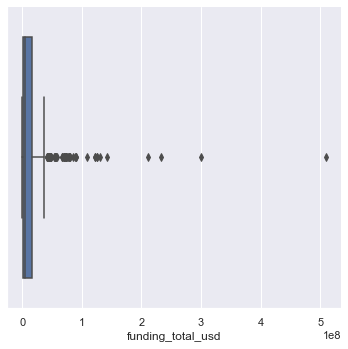

In [113]:
sns.catplot(data=dataft, x="funding_total_usd", kind="box")
plt.savefig('output5.png')

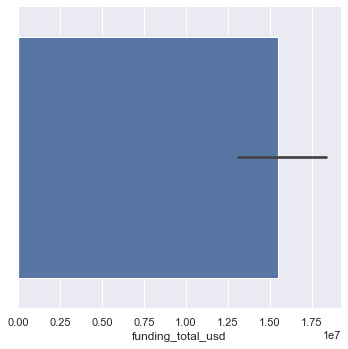

In [112]:
sns.catplot(data=dataft, x="funding_total_usd", kind="bar")
plt.savefig('output5.png')

In [114]:
data[['funding_total_usd','avg_participants','funding_rounds','relationships']].describe()

,funding_total_usd,avg_participants,funding_rounds,relationships
count,9.230000e+02,923.000000,923.000000,923.000000
mean,2.541975e+07,2.838586,2.310943,7.710726
std,1.896344e+08,1.874601,1.390922,7.265776
min,1.100000e+04,1.000000,1.000000,0.000000
25%,2.725000e+06,1.500000,1.000000,3.000000
50%,1.000000e+07,2.500000,2.000000,5.000000
75%,2.472500e+07,3.800000,3.000000,10.000000
max,5.700000e+09,16.000000,10.000000,63.000000


In [ ]:
sns.histplot(datas.funding_total_usd,kde=True)
plt.savefig('output6.png')

In [127]:
datas = data[data['funding_total_usd'] <= 100000000 ]

In [55]:
data['founded_at_year'].unique()

<PeriodArray>
['2007', '2000', '2009', '2002', '2010', '2005', '2004', '2006', '2001',
 '1999', '2003', '2008', '2011', '2012', '1998', '2013', '1985', '1997',
 '1996', '1992', '1990', '1984', '1995']
Length: 23, dtype: period[A-DEC]